In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('../data/pp_4l_all.csv')
cols_cont = [
    'E1', 'p1x', 'p1y', 'p1z', 
    'E2', 'p2x', 'p2y', 'p2z',
    'E3', 'p3x', 'p3y', 'p3z',
    'E4', 'p4x', 'p4y', 'p4z', 
]
cols_cat = ['pdg1', 'pdg2', 'pdg3', 'pdg4']

df['schema'] = df[cols_cat].groupby(by=cols_cat).ngroup().values

In [73]:
df.head()

,pdg1,E1,p1x,p1y,p1z,pdg2,E2,p2x,p2y,p2z,...,E3,p3x,p3y,p3z,pdg4,E4,p4x,p4y,p4z,schema
0,11,20.274241,13.753708,1.397849,14.829915,-11,13.459523,-13.458053,-0.178631,0.087476,...,10.726935,1.457106,-9.715445,-4.306151,-13,19.941356,-1.752761,8.496227,17.955180,1
1,13,152.820099,63.584427,18.996694,-137.659427,-13,164.917905,4.471840,31.646155,-161.791309,...,137.529487,-39.586901,-44.338982,-124.021291,-13,39.559938,-28.469366,-6.303867,-26.734509,2
2,11,51.267102,27.995380,26.039697,34.154190,-11,43.013595,-7.827488,-17.337374,-38.578689,...,123.210062,0.378806,-41.833551,115.890116,-13,46.883635,-20.546697,33.131228,26.042638,1
3,13,64.805282,-3.653628,46.355274,45.139262,-13,38.158727,-29.094263,-15.298609,-19.379208,...,57.805237,34.629435,10.578369,45.059234,-13,42.993259,-1.881544,-41.635034,10.554281,2
4,13,25.501529,17.607195,-7.617831,-16.800957,-13,22.270427,3.366801,16.786119,-14.242599,...,36.269401,-21.935459,13.187325,-25.698023,-13,47.012227,0.961463,-22.355613,-41.345380,2


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pdg1    20000 non-null  int64  
 1   E1      20000 non-null  float64
 2   p1x     20000 non-null  float64
 3   p1y     20000 non-null  float64
 4   p1z     20000 non-null  float64
 5   pdg2    20000 non-null  int64  
 6   E2      20000 non-null  float64
 7   p2x     20000 non-null  float64
 8   p2y     20000 non-null  float64
 9   p2z     20000 non-null  float64
 10  pdg3    20000 non-null  int64  
 11  E3      20000 non-null  float64
 12  p3x     20000 non-null  float64
 13  p3y     20000 non-null  float64
 14  p3z     20000 non-null  float64
 15  pdg4    20000 non-null  int64  
 16  E4      20000 non-null  float64
 17  p4x     20000 non-null  float64
 18  p4y     20000 non-null  float64
 19  p4z     20000 non-null  float64
dtypes: float64(16), int64(4)
memory usage: 3.1 MB


In [46]:
df[cols_cont].corr()

,E1,p1x,p1y,p1z,E2,p2x,p2y,p2z,E3,p3x,p3y,p3z,E4,p4x,p4y,p4z
E1,1.000000,-0.025519,0.038528,0.046080,0.147036,0.016530,-0.031941,0.004488,0.219254,0.021867,-0.011827,-0.002915,0.213870,-0.012199,0.005354,-0.020167
p1x,-0.025519,1.000000,-0.018073,-0.025215,-0.003631,-0.222625,0.016528,-0.017663,-0.018014,-0.412613,0.005801,-0.009744,0.012223,-0.378038,-0.004322,-0.015271
p1y,0.038528,-0.018073,1.000000,0.037689,-0.001964,0.003036,-0.233987,0.006501,0.011261,0.020142,-0.405386,0.015923,0.013187,-0.004632,-0.361118,0.005680
p1z,0.046080,-0.025215,0.037689,1.000000,0.009783,0.019448,-0.021978,0.408186,0.004924,0.012936,-0.018435,0.331046,-0.010994,-0.006630,0.002812,0.346276
E2,0.147036,-0.003631,-0.001964,0.009783,1.000000,0.022135,0.004009,-0.025595,0.202750,-0.017546,-0.022113,-0.008136,0.228243,-0.001038,0.020174,-0.020616
p2x,0.016530,-0.222625,0.003036,0.019448,0.022135,1.000000,-0.016558,0.009717,0.010495,-0.356848,0.002225,-0.000637,-0.001066,-0.415588,0.011383,0.015239
p2y,-0.031941,0.016528,-0.233987,-0.021978,0.004009,-0.016558,1.000000,-0.020515,0.013053,-0.010828,-0.366205,-0.007244,0.004147,0.010417,-0.403490,-0.000743
p2z,0.004488,-0.017663,0.006501,0.408186,-0.025595,0.009717,-0.020515,1.000000,-0.009071,0.008594,0.012856,0.359349,-0.012568,-0.000323,0.001196,0.308721
E3,0.219254,-0.018014,0.011261,0.004924,0.202750,0.010495,0.013053,-0.009071,1.000000,-0.007245,-0.031746,-0.008140,0.131580,0.014793,0.007473,-0.010825
p3x,0.021867,-0.412613,0.020142,0.012936,-0.017546,-0.356848,-0.010828,0.008594,-0.007245,1.000000,-0.009714,0.008195,-0.002374,-0.214083,0.000440,0.011012


In [15]:
e_sum_sq = np.power(df['E1'] + df['E2'] + df['E3'] + df['E4'], 2)
x_sum_sq = np.power(df['p1x'] + df['p2x'] + df['p3x'] + df['p4x'], 2)
y_sum_sq = np.power(df['p1y'] + df['p2y'] + df['p3y'] + df['p4y'], 2)
z_sum_sq = np.power(df['p1z'] + df['p2z'] + df['p3z'] + df['p4z'], 2)
m_values = np.sqrt(e_sum_sq - x_sum_sq - y_sum_sq - z_sum_sq)

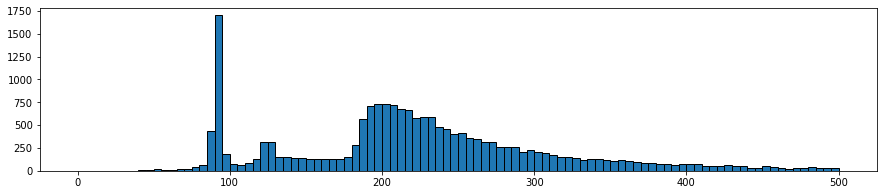

In [26]:
plt.figure(figsize=(15, 3))
plt.hist(m_values, bins=100, range=(0, 500), edgecolor='black')
plt.show()

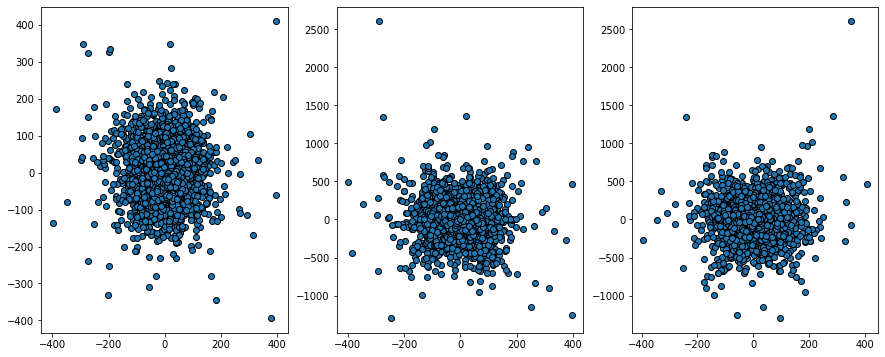

In [39]:
# plt.subplots(1, 3)
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.scatter(df['p1x'], df['p1y'], edgecolor='black')
plt.subplot(1, 3, 2)
plt.scatter(df['p1x'], df['p1z'], edgecolor='black')
plt.subplot(1, 3, 3)
plt.scatter(df['p1y'], df['p1z'], edgecolor='black')

# Particle combinations

In [85]:
# eiles tvarka nesvarbi
df[df['schema'] == 2][cols_cat]

,pdg1,pdg2,pdg3,pdg4
1,13,-13,13,-13
3,13,-13,13,-13
4,13,-13,13,-13
11,13,-13,13,-13
15,13,-13,13,-13
...,...,...,...,...
19984,13,-13,13,-13
19991,13,-13,13,-13
19995,13,-13,13,-13
19997,13,-13,13,-13


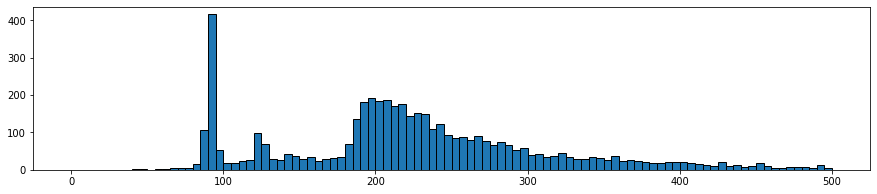

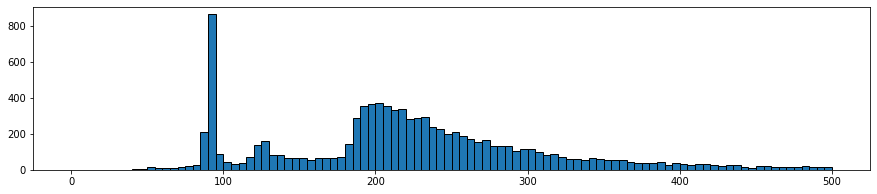

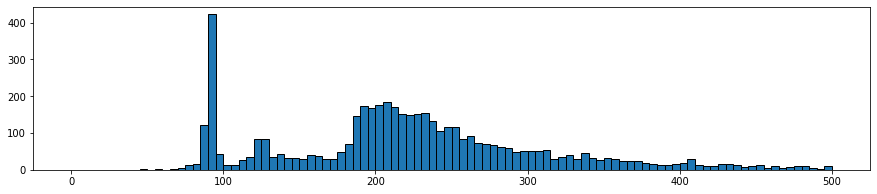

In [80]:
# Histograms by schemas
for schema in range(3):
    plt.figure(figsize=(15, 3))
    plt.hist(m_values[df['schema'] == schema], bins=100, range=(0, 500), edgecolor='black')
    plt.show()

In [77]:
df[df['schema'] == 2]

,pdg1,E1,p1x,p1y,p1z,pdg2,E2,p2x,p2y,p2z,...,E3,p3x,p3y,p3z,pdg4,E4,p4x,p4y,p4z,schema
1,13,152.820099,63.584427,18.996694,-137.659427,-13,164.917905,4.471840,31.646155,-161.791309,...,137.529487,-39.586901,-44.338982,-124.021291,-13,39.559938,-28.469366,-6.303867,-26.734509,2
3,13,64.805282,-3.653628,46.355274,45.139262,-13,38.158727,-29.094263,-15.298609,-19.379208,...,57.805237,34.629435,10.578369,45.059234,-13,42.993259,-1.881544,-41.635034,10.554281,2
4,13,25.501529,17.607195,-7.617831,-16.800957,-13,22.270427,3.366801,16.786119,-14.242599,...,36.269401,-21.935459,13.187325,-25.698023,-13,47.012227,0.961463,-22.355613,-41.345380,2
11,13,130.667624,29.693524,3.058917,-127.212242,-13,69.403678,6.993769,10.518512,-68.244468,...,63.371807,-29.701150,-5.328788,-55.726300,-13,22.402830,-6.986144,-8.248640,-19.622166,2
15,13,51.237575,38.009029,-25.701399,-22.804159,-13,54.604287,5.450239,39.518440,37.285450,...,35.822650,24.435327,13.434683,22.487222,-13,77.490341,-67.894596,-27.251724,25.542301,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19984,13,128.413075,35.752033,-38.966910,-117.018285,-13,50.718208,16.784094,40.653253,-25.257328,...,35.681076,0.961081,-35.665881,-0.386294,-13,86.185336,-53.497208,33.979538,-58.406683,2
19991,13,19.586459,-13.042086,-0.382422,-14.607394,-13,433.622239,120.358373,-2.804557,-416.574401,...,164.590681,-77.072310,67.107228,129.021549,-13,87.871028,-30.243978,-63.920250,52.161382,2
19995,13,104.780662,42.444194,-70.801849,64.533437,-13,40.669899,15.498023,29.488293,23.329839,...,70.717828,-10.422217,-15.453176,68.217130,-13,76.806457,-47.520000,56.766732,20.459923,2
19997,13,165.372773,42.569775,-26.508450,-157.585720,-13,129.240829,-42.380560,7.956206,-121.835002,...,110.152618,-40.177549,23.109741,99.926436,-13,49.993973,39.988334,-4.557497,29.657184,2
